In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, f1_score
)

## Task 5: Binary Classification with Logistic Regression


● Load the Breast Cancer Dataset from sklearn.datasets.


In [20]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [21]:
X = data.data
y = data.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

● Train a logistic regression model to predict whether a tumor is benign or malignant.

In [23]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [24]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

● Evaluate using: 

○ Accuracy

○ Confusion Matrix

○ Precision, Recall, F1-score

○ ROC-AUC curve

In [27]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)

Accuracy: 0.956140350877193


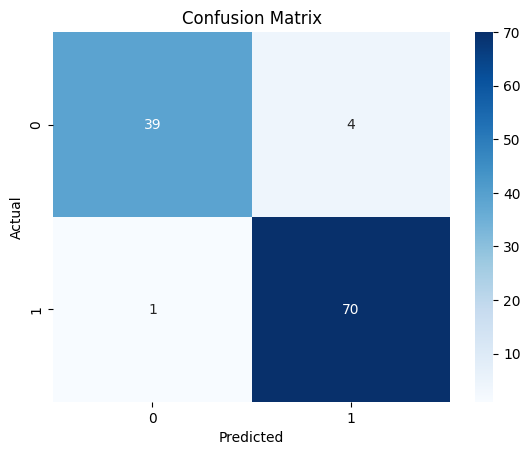

In [ ]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Precision, Recall, f1-Score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [31]:
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

roc_auc

0.9977071732721913

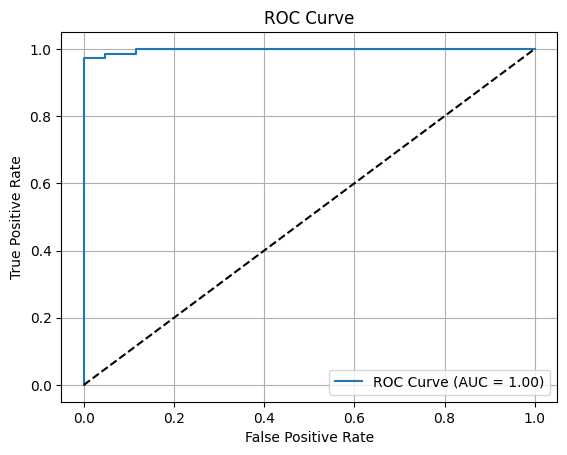

In [32]:
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Task 6: Threshold Tuning and Probability Interpretation


● Predict the probability of the positive class.

In [33]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [41]:
y_prob = model.predict_proba(X_test)[:, 1]
y_prob

array([8.75648676e-01, 2.90664117e-08, 1.62797877e-03, 9.98714013e-01,
       9.99848514e-01, 2.19561566e-10, 5.58868804e-11, 1.90402010e-02,
       9.85045505e-01, 9.94072010e-01, 9.29019322e-01, 8.16377840e-04,
       9.88851915e-01, 1.80327724e-01, 9.99161979e-01, 1.77373333e-03,
       9.98749609e-01, 9.99986075e-01, 9.99999135e-01, 6.86561927e-07,
       8.28498840e-01, 9.92059075e-01, 5.85866726e-09, 9.99614139e-01,
       9.96294334e-01, 9.99747308e-01, 9.98920232e-01, 9.98867515e-01,
       9.95179367e-01, 7.65907033e-09, 9.98404860e-01, 9.99742118e-01,
       9.98949956e-01, 9.85969254e-01, 9.99866502e-01, 9.98957286e-01,
       2.13548906e-03, 9.98886704e-01, 9.92666990e-06, 7.20548555e-01,
       9.99754062e-01, 6.45317438e-04, 9.99501332e-01, 9.95746871e-01,
       9.99736464e-01, 9.81683802e-01, 9.99961321e-01, 9.99442649e-01,
       9.57533039e-01, 9.98509505e-01, 9.38728865e-05, 2.99995297e-09,
       8.61275553e-01, 9.99600340e-01, 9.99349868e-01, 9.85650248e-01,
      

● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the confusion matrix and F1-score change.

In [46]:
def evaluate_threshold(thresh):
    y_pred_thresh = (y_prob >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"\nThreshold: {thresh}")
    print("Confusion Matrix:")
    print(cm)
    print(f"F1-score: {f1:.4f}")
    return y_pred_thresh

In [47]:
for t in [0.3, 0.5, 0.7]:
    evaluate_threshold(t)


Threshold: 0.3
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1-score: 0.9655

Threshold: 0.5
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1-score: 0.9655

Threshold: 0.7
Confusion Matrix:
[[41  2]
 [ 1 70]]
F1-score: 0.9790


In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

In [51]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

● Plot the ROC curve and mark optimal threshold.

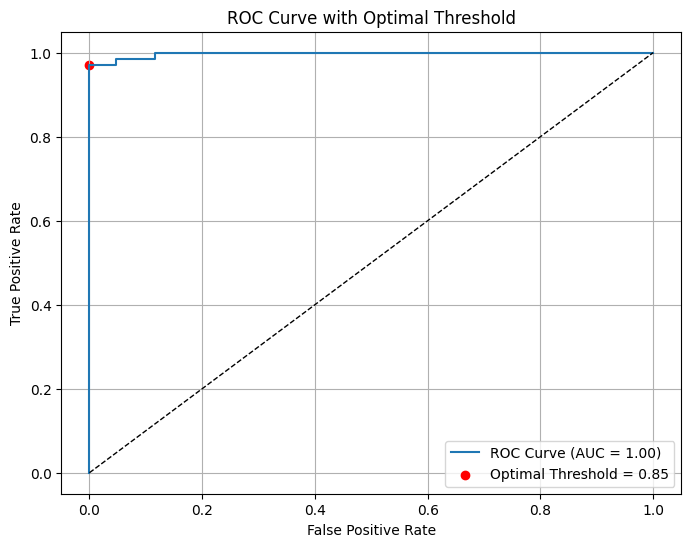

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
print("\nAt Optimal Threshold:")
y_pred_opt = (y_prob >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_opt, target_names=data.target_names))


At Optimal Threshold:
              precision    recall  f1-score   support

   malignant       0.96      1.00      0.98        43
      benign       1.00      0.97      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



● Use the Iris Dataset to perform multiclass logistic regression.

● Use one-vs-rest or multinomial strategy.

● Evaluate model accuracy and classification report